In [64]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [66]:
df = pd.read_csv('./Data/avpat_avtum_sactpat_sacttum_sactreg.csv', sep = '^', index_col = 0)
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE.1,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2
0,10000724,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001750,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
df.shape

(105686, 92)

In [68]:
df.isna().sum()

PATIENTID                0
SEX                      0
ETHNICITY             6918
NEWVITALSTATUS           0
NUMBER_TUMOURS           0
SC500                    0
SC501                    0
SC502                    0
SC503                    0
SC504                    0
SC505                    0
SC506                    0
SC508                    0
BEH_BENIGN               0
BEH_MALIG                0
BEH_MICINV               0
BEH_INSITU               0
BEH_UNCERT               0
T0                       0
T1                       0
T2                       0
T3                       0
T4                       0
N0                       0
N1                       0
N2                       0
N3                       0
M1                       0
STAGE0                   0
STAGE1                   0
STAGE2                   0
STAGE3                   0
STAGE4                   0
GRADE1                   0
GRADE2                   0
GRADE3                   0
GRADE4                   0
A

In [69]:
df.dtypes

PATIENTID               int64
SEX                    object
ETHNICITY              object
NEWVITALSTATUS         object
NUMBER_TUMOURS          int64
SC500                    bool
SC501                    bool
SC502                    bool
SC503                    bool
SC504                    bool
SC505                    bool
SC506                    bool
SC508                    bool
BEH_BENIGN               bool
BEH_MALIG                bool
BEH_MICINV               bool
BEH_INSITU               bool
BEH_UNCERT               bool
T0                       bool
T1                       bool
T2                       bool
T3                       bool
T4                       bool
N0                       bool
N1                       bool
N2                       bool
N3                       bool
M1                       bool
STAGE0                   bool
STAGE1                   bool
STAGE2                   bool
STAGE3                   bool
STAGE4                   bool
GRADE1    

In [70]:
original_memory = df.memory_usage(deep=True).sum() / 1024**2 
print('Memory used: %.1f GB' % original_memory)

Memory used: 34.9 GB


In [71]:
for col in ['SEX', 'ETHNICITY']:
    df[col] = df[col].astype('category')
    
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE.1,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2
0,10000724,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001750,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
def dead(value):
    if value == 'D':
        return 1
    else:
        return 0

df['DEAD'] = df['NEWVITALSTATUS'].apply(dead)    
df['DEAD'].value_counts()

0    104333
1      1353
Name: DEAD, dtype: int64

In [73]:
df = df.drop(['NEWVITALSTATUS'], axis = 1)
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE.1,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2,DEAD
0,10000724,M,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,10000752,F,White British,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,10001050,F,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,10001750,M,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,10001824,F,Other ethnic group,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


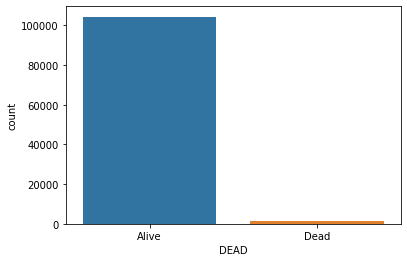

In [74]:
ax = sns.countplot(data = df, x = 'DEAD')
ax.set_xticklabels(['Alive', 'Dead'])
plt.show()

In [75]:
percentage_alive = np.mean(df['DEAD'] == 0) * 100
percentage_dead = np.mean(df['DEAD'] == 1) * 100
print("Percentage of patients classified as alive: %.2f" % percentage_alive)
print("Percentage of patients classified as dead: %.2f" % percentage_dead)

Percentage of patients classified as alive: 98.72
Percentage of patients classified as dead: 1.28


In [76]:
new_memory = df.memory_usage(deep = True).sum() / 1024 ** 2 
print('Memory used: %.1f GB' % new_memory)

Memory used: 20.7 GB


In [77]:
df.shape

(105686, 92)

In [78]:
df.columns

Index(['PATIENTID', 'SEX', 'ETHNICITY', 'NUMBER_TUMOURS', 'SC500', 'SC501',
       'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508', 'BEH_BENIGN',
       'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 'T0', 'T1', 'T2',
       'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 'STAGE0', 'STAGE1', 'STAGE2',
       'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEAN',
       'L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901',
       'ER_POS', 'PR_POS', 'HER_POS', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT',
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2',
       'ACE3', 'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2',
       'DEPR3', 'DEPR4', 'DEPR5', 'CANCER_DAYS_MEAN', 'CANCER_MONTHS_MEAN',
       'CANCER_YEARS_MEAN', 'BMI3', 'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE',
       'CURATIVE.1', 'ADJUVANT', 'DISEASE_MOD', 'STAGING', 'CT_YES',
       'CHEM_RAD_YES', 'CHEMOTHERAPY2', 'TARGETED2', 'CHEM_TARG2',
       'CHEM

In [79]:
df = pd.concat([df[['PATIENTID', 'NUMBER_TUMOURS', 'SC500', 'SC501',
       'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 'SC508', 'BEH_BENIGN',
       'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 'T0', 'T1', 'T2',
       'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 'STAGE0', 'STAGE1', 'STAGE2',
       'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEAN',
       'L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901',
       'ER_POS', 'PR_POS', 'HER_POS', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT',
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'ACE0', 'ACE1', 'ACE2',
       'ACE3', 'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 'DEPR1', 'DEPR2',
       'DEPR3', 'DEPR4', 'DEPR5', 'CANCER_DAYS_MEAN', 'CANCER_MONTHS_MEAN','CANCER_YEARS_MEAN', 
       'BMI3', 'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT',
       'DISEASE_MOD', 'STAGING', 'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2', 'TARGETED2',
       'CHEM_TARG2', 'CHEM_RADIO2', 'TARG_RADIO2', 'CHEM_RADIO_TARG2',
       'HORM_TARG2', 'HORMONE2', 'OTHER2', 'DEAD']],                      
        pd.get_dummies(df['SEX'], prefix = 'SEX'),                      
        pd.get_dummies(df['ETHNICITY'], prefix = 'ETHNICITY'),
        ], axis = 1)
df.head()

# df.drop(['SEX', 'ETHNICITY'], axis = 1)

,PATIENTID,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2,DEAD,SEX_F,SEX_M,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
0,10000724,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10000752,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10001050,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10001750,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,10001824,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.325078,False,False,False,False,False,False,False,False

In [80]:
df.isna().sum()

PATIENTID                                  0
NUMBER_TUMOURS                             0
SC500                                      0
SC501                                      0
SC502                                      0
SC503                                      0
SC504                                      0
SC505                                      0
SC506                                      0
SC508                                      0
BEH_BENIGN                                 0
BEH_MALIG                                  0
BEH_MICINV                                 0
BEH_INSITU                                 0
BEH_UNCERT                                 0
T0                                         0
T1                                         0
T2                                         0
T3                                         0
T4                                         0
N0                                         0
N1                                         0
N2        

In [81]:
df.columns.tolist()

['PATIENTID',
 'NUMBER_TUMOURS',
 'SC500',
 'SC501',
 'SC502',
 'SC503',
 'SC504',
 'SC505',
 'SC506',
 'SC508',
 'BEH_BENIGN',
 'BEH_MALIG',
 'BEH_MICINV',
 'BEH_INSITU',
 'BEH_UNCERT',
 'T0',
 'T1',
 'T2',
 'T3',
 'T4',
 'N0',
 'N1',
 'N2',
 'N3',
 'M1',
 'STAGE0',
 'STAGE1',
 'STAGE2',
 'STAGE3',
 'STAGE4',
 'GRADE1',
 'GRADE2',
 'GRADE3',
 'GRADE4',
 'AGE_MEAN',
 'L0801',
 'L1001',
 'L1701',
 'L0201',
 'L0401',
 'L1201',
 'L0301',
 'L0901',
 'ER_POS',
 'PR_POS',
 'HER_POS',
 'CURATIVE',
 'NONCURATIVE',
 'NOACTTREAT',
 'ECOG0',
 'ECOG1',
 'ECOG2',
 'ECOG3',
 'ECOG4',
 'ACE0',
 'ACE1',
 'ACE2',
 'ACE3',
 'LEFT',
 'RIGHT',
 'MIDLINE',
 'BILATERAL',
 'DEPR1',
 'DEPR2',
 'DEPR3',
 'DEPR4',
 'DEPR5',
 'CANCER_DAYS_MEAN',
 'CANCER_MONTHS_MEAN',
 'CANCER_YEARS_MEAN',
 'BMI3',
 'NEOADJUVANT',
 'DIAGNOSTIC',
 'PALLIATIVE',
 'CURATIVE',
 'ADJUVANT',
 'DISEASE_MOD',
 'STAGING',
 'CT_YES',
 'CHEM_RAD_YES',
 'CHEMOTHERAPY2',
 'TARGETED2',
 'CHEM_TARG2',
 'CHEM_RADIO2',
 'TARG_RADIO2',
 'CHEM_RAD

In [82]:
X = df[['NUMBER_TUMOURS','SC500','SC501','SC502','SC503','SC504','SC505','SC506','SC508',
 'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT','T0','T1','T2','T3','T4',
 'N0','N1','N2','N3','M1','STAGE0','STAGE1','STAGE2','STAGE3','STAGE4',
 'GRADE1','GRADE2','GRADE3','GRADE4','AGE_MEAN','L0801','L1001','L1701',
 'L0201','L0401','L1201','L0301','L0901','ER_POS','PR_POS','HER_POS',
 'CURATIVE','NONCURATIVE','NOACTTREAT','ECOG0','ECOG1','ECOG2','ECOG3','ECOG4','ACE0','ACE1',
 'ACE2','ACE3','LEFT','RIGHT','MIDLINE','BILATERAL','DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
 'CANCER_YEARS_MEAN','BMI3','NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT',
 'DISEASE_MOD','STAGING','CT_YES','CHEM_RAD_YES','CHEMOTHERAPY2','TARGETED2','CHEM_TARG2',
 'CHEM_RADIO2','TARG_RADIO2','CHEM_RADIO_TARG2','HORM_TARG2','HORMONE2','OTHER2',
 'SEX_F','SEX_M','ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian',
 'ETHNICITY_Asian Pakistani','ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
 'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African','ETHNICITY_Other',
 'ETHNICITY_Other Asian background','ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
 'ETHNICITY_Other mixed background','ETHNICITY_Other white background','ETHNICITY_White',
 'ETHNICITY_White British','ETHNICITY_White Irish','ETHNICITY_White and black Caribbean']]

In [83]:
y = df['DEAD']

In [84]:
X.shape

(105686, 108)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [86]:
y_train.value_counts()

0    83454
1     1094
Name: DEAD, dtype: int64

In [87]:
y_test.value_counts()

0    20879
1      259
Name: DEAD, dtype: int64

In [88]:
df.shape

(105686, 110)

In [89]:
X_train_cat = X_train[['SC500','SC501','SC502','SC503','SC504','SC505','SC506','SC508',
 'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT','T0','T1','T2','T3','T4',
 'N0','N1','N2','N3','M1','STAGE0','STAGE1','STAGE2','STAGE3','STAGE4',
 'GRADE1','GRADE2','GRADE3','GRADE4','L0801','L1001','L1701',
 'L0201','L0401','L1201','L0301','L0901','ER_POS','PR_POS','HER_POS',
 'CURATIVE','NONCURATIVE','NOACTTREAT','ECOG0','ECOG1','ECOG2','ECOG3','ECOG4','ACE0','ACE1',
 'ACE2','ACE3','LEFT','RIGHT','MIDLINE','BILATERAL','DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING','CT_YES','CHEM_RAD_YES',
 'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','CHEM_RADIO_TARG2','HORM_TARG2',
 'HORMONE2','OTHER2','SEX_F','SEX_M','ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian',
 'ETHNICITY_Asian Pakistani','ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
 'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African','ETHNICITY_Other',
 'ETHNICITY_Other Asian background','ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
 'ETHNICITY_Other mixed background','ETHNICITY_Other white background','ETHNICITY_White',
 'ETHNICITY_White British','ETHNICITY_White Irish','ETHNICITY_White and black Caribbean']]

In [90]:
X_test_cat = X_test[['SC500','SC501','SC502','SC503','SC504','SC505','SC506','SC508',
 'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT','T0','T1','T2','T3','T4',
 'N0','N1','N2','N3','M1','STAGE0','STAGE1','STAGE2','STAGE3','STAGE4',
 'GRADE1','GRADE2','GRADE3','GRADE4','L0801','L1001','L1701',
 'L0201','L0401','L1201','L0301','L0901','ER_POS','PR_POS','HER_POS',
 'CURATIVE','NONCURATIVE','NOACTTREAT','ECOG0','ECOG1','ECOG2','ECOG3','ECOG4','ACE0','ACE1',
 'ACE2','ACE3','LEFT','RIGHT','MIDLINE','BILATERAL','DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING','CT_YES','CHEM_RAD_YES',
 'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','CHEM_RADIO_TARG2','HORM_TARG2',
 'HORMONE2','OTHER2','SEX_F','SEX_M','ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian',
 'ETHNICITY_Asian Pakistani','ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
 'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African','ETHNICITY_Other',
 'ETHNICITY_Other Asian background','ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
 'ETHNICITY_Other mixed background','ETHNICITY_Other white background','ETHNICITY_White',
 'ETHNICITY_White British','ETHNICITY_White Irish','ETHNICITY_White and black Caribbean']]

In [91]:
list_num = ['NUMBER_TUMOURS','AGE_MEAN','CANCER_YEARS_MEAN','BMI3']

In [92]:
X_train_num = X_train[list_num]

In [93]:
X_test_num = X_test[list_num]

In [94]:
X_train_cat.shape

(84548, 108)

In [95]:
X_test_cat.shape

(21138, 108)

In [96]:
X_train_num.shape

(84548, 4)

In [97]:
X_test_num.shape

(21138, 4)

In [98]:
fs_num = SelectKBest(score_func = f_classif, k = 'all')
fs_num.fit(X_train_num, y_train)
# features = x_train.columns[selection.get_support()]
# print(features)
# X_train_fs_num = fs_num.transform(X_train_num)
# X_test_fs_num = fs_num.transform(X_test_num)

SelectKBest(k='all', score_func=<function f_classif at 0x7ff5ae1c4b90>)

In [99]:
for n,s in zip(X_train_num.columns, fs_num.scores_):
    print('Score: %.3f for feature %s' % (s,n))

Score: 6.863 for feature NUMBER_TUMOURS
Score: 24.241 for feature AGE_MEAN
Score: 2931.102 for feature CANCER_YEARS_MEAN
Score: 0.849 for feature BMI3


In [100]:
# result_num = []
# for n,s in zip(X_train_num.columns, fs_num.scores_):
#     if s > 1:
#         result_num.append(n)
#         print('Score: %.3f for feature %s' % (s,n))
#     else:
#         print('Score: %.3f for feature %s' % (s,n))

In [101]:
result_num = list_num

In [102]:
# result_num

In [103]:
# for i in range(len(fs_num.scores_)):
#     print('Feature %d: %f' % (i, fs_num.scores_[i]))

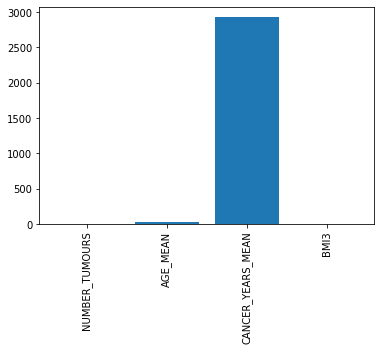

In [104]:
plt.bar([i for i in range(len(fs_num.scores_))], fs_num.scores_)
plt.xticks(range(4), ['NUMBER_TUMOURS','AGE_MEAN','CANCER_YEARS_MEAN','BMI3'], rotation = 90)
plt.show()

In [105]:
fs_cat = SelectKBest(score_func = chi2, k = 'all')
fs_cat.fit(X_train_cat, y_train)
# X_train_fs_cat = fs_cat.transform(X_train_cat)
# X_test_fs_cat = fs_cat.transform(X_test_cat)

SelectKBest(k='all', score_func=<function chi2 at 0x7ff5ad98d560>)

In [106]:
limit = 8

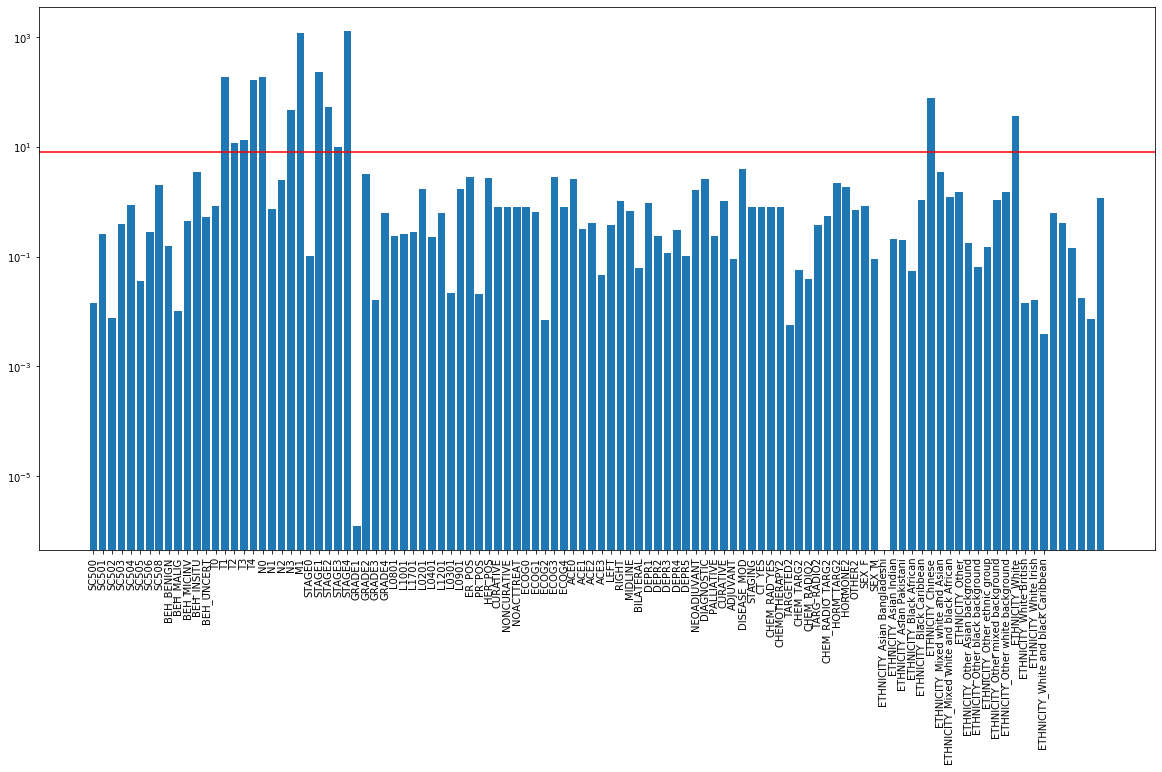

In [107]:
plt.figure(figsize=(20,10))
plt.bar([i for i in range(len(fs_cat.scores_))], fs_cat.scores_)
plt.xticks(range(102), ['SC500','SC501','SC502','SC503','SC504','SC505','SC506','SC508',
 'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT','T0','T1','T2','T3','T4',
 'N0','N1','N2','N3','M1','STAGE0','STAGE1','STAGE2','STAGE3','STAGE4',
 'GRADE1','GRADE2','GRADE3','GRADE4','L0801','L1001','L1701',
 'L0201','L0401','L1201','L0301','L0901','ER_POS','PR_POS','HER_POS',
 'CURATIVE','NONCURATIVE','NOACTTREAT','ECOG0','ECOG1','ECOG2','ECOG3','ECOG4','ACE0','ACE1',
 'ACE2','ACE3','LEFT','RIGHT','MIDLINE','BILATERAL','DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING','CT_YES','CHEM_RAD_YES',
 'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','CHEM_RADIO_TARG2','HORM_TARG2',
 'HORMONE2','OTHER2','SEX_F','SEX_M','ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian',
 'ETHNICITY_Asian Pakistani','ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
 'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African','ETHNICITY_Other',
 'ETHNICITY_Other Asian background','ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
 'ETHNICITY_Other mixed background','ETHNICITY_Other white background','ETHNICITY_White',
 'ETHNICITY_White British','ETHNICITY_White Irish','ETHNICITY_White and black Caribbean'], rotation = 90)
plt.axhline(y = limit, color = 'red')
plt.gca().set_yscale('log')
plt.show()

In [108]:
# what are scores for the features
result_cat = []
for n,s in zip(X_train_cat.columns, fs_cat.scores_):
    if s > limit:
        result_cat.append(n)
        print('Score: %.3f for feature %s' % (s,n))
    else:
        print('Score: %.3f for feature %s' % (s,n))

Score: 0.014 for feature SC500
Score: 0.262 for feature SC501
Score: 0.008 for feature SC502
Score: 0.401 for feature SC503
Score: 0.876 for feature SC504
Score: 0.036 for feature SC505
Score: 0.284 for feature SC506
Score: 1.995 for feature SC508
Score: 0.157 for feature BEH_BENIGN
Score: 0.010 for feature BEH_MALIG
Score: 0.456 for feature BEH_MICINV
Score: 3.489 for feature BEH_INSITU
Score: 0.537 for feature BEH_UNCERT
Score: 0.826 for feature T0
Score: 189.645 for feature T1
Score: 11.673 for feature T2
Score: 13.366 for feature T3
Score: 164.221 for feature T4
Score: 190.574 for feature N0
Score: 0.748 for feature N1
Score: 2.520 for feature N2
Score: 47.813 for feature N3
Score: 1211.387 for feature M1
Score: 0.104 for feature STAGE0
Score: 229.058 for feature STAGE1
Score: 53.889 for feature STAGE2
Score: 10.015 for feature STAGE3
Score: 1276.170 for feature STAGE4
Score: 0.000 for feature GRADE1
Score: 3.180 for feature GRADE2
Score: 0.016 for feature GRADE3
Score: 0.616 for f

In [109]:
result_cat 

['T1',
 'T2',
 'T3',
 'T4',
 'N0',
 'N3',
 'M1',
 'STAGE1',
 'STAGE2',
 'STAGE3',
 'STAGE4',
 'SEX_M',
 'ETHNICITY_Other']

In [110]:
X_train.shape

(84548, 108)

In [111]:
columns = result_num + result_cat

In [112]:
X_train = X_train[columns]

In [113]:
X_train.shape

(84548, 17)

In [114]:
X_test.shape

(21138, 108)

In [115]:
X_test = X_test[columns]

In [116]:
X_test.shape

(21138, 17)

In [223]:
logr = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000) 

In [224]:
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
cv = 3
recall_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="recall").mean()
precision_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="precision").mean()
f1_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="f1").mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.810
Precision: 0.059
F1-score: 0.110


In [53]:
# print('Best accuracy score: %.3f' % logr_grid.best_score_) 
# print('Best parameters: %s' % logr_grid.best_params_)

In [54]:
# logr_grid = GridSearchCV(LogisticRegression(class_weight = 'balanced'), param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
#                         cv = 5, scoring = 'recall')   

In [55]:
# logr_grid.fit(X_train,y_train)

In [56]:
# print('Best recall score: %.3f' % logr_grid.best_score_) 
# print('Best parameters: %s' % logr_grid.best_params_)

In [213]:
logr_grid = GridSearchCV(logr, param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                        cv = 3, scoring = 'precision') 

In [214]:
logr_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [215]:
print('Best precision score: %.3f' % logr_grid.best_score_) 
print('Best parameters: %s' % logr_grid.best_params_)

Best precision score: 0.059
Best parameters: {'C': 100}


In [60]:
# logr_grid = GridSearchCV(LogisticRegression(class_weight = 'balanced'), param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
#                         cv = 5, scoring = 'f1') 

In [61]:
# sorted(sklearn.metrics.SCORERS.keys())

In [62]:
# logr_grid.fit(X_train,y_train)

In [63]:
# print('Best F-score: %.3f' % logr_grid.best_score_) 
# print('Best parameters: %s' % logr_grid.best_params_)

In [64]:
# logr_grid = GridSearchCV(LogisticRegression(class_weight = 'balanced'), param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
#                         cv = 5, scoring = 'roc_auc') 

In [65]:
# logr_grid.fit(X_train,y_train)

In [66]:
# print('Best roc_auc score: %.3f' % logr_grid.best_score_) 
# print('Best parameters: %s' % logr_grid.best_params_)

In [129]:
y_predicted = logr.predict(X_test)

In [133]:
columns

['NUMBER_TUMOURS',
 'AGE_MEAN',
 'CANCER_YEARS_MEAN',
 'BMI3',
 'T1',
 'T2',
 'T3',
 'T4',
 'N0',
 'N3',
 'M1',
 'STAGE1',
 'STAGE2',
 'STAGE3',
 'STAGE4',
 'SEX_M',
 'ETHNICITY_Other',
 'DEAD']

In [134]:
y_predicted_df = pd.DataFrame(data = y_predicted, columns = ['y_predicted'], index = X_test.index.copy())
df_logr = pd.merge(df[columns], 
  y_predicted_df, how = 'left', left_index = True, right_index = True)

In [135]:
df_logr[((df_logr['DEAD'] == 0) & (df_logr['y_predicted'] == 1)) | ((df_logr['DEAD'] == 1) & (df_logr['y_predicted'] == 0))].count()

NUMBER_TUMOURS       3617
AGE_MEAN             3617
CANCER_YEARS_MEAN    3617
BMI3                 3617
T1                   3617
T2                   3617
T3                   3617
T4                   3617
N0                   3617
N3                   3617
M1                   3617
STAGE1               3617
STAGE2               3617
STAGE3               3617
STAGE4               3617
SEX_M                3617
ETHNICITY_Other      3617
DEAD                 3617
y_predicted          3617
dtype: int64

In [136]:
wrong_logr = df_logr[((df_logr['DEAD'] == 0) & (df_logr['y_predicted'] == 1)) | ((df_logr['DEAD'] == 1) & (df_logr['y_predicted'] == 0))]

In [137]:
wrong_logr.head()

,NUMBER_TUMOURS,AGE_MEAN,CANCER_YEARS_MEAN,BMI3,T1,T2,T3,T4,N0,N3,M1,STAGE1,STAGE2,STAGE3,STAGE4,SEX_M,ETHNICITY_Other,DEAD,y_predicted
5,1,93.0,1.177300,27.325078,True,False,False,False,False,False,False,False,True,False,False,1,0,0,1.0
10,1,50.0,1.681075,27.325078,False,False,False,True,False,True,True,False,False,False,True,1,0,0,1.0
17,1,82.0,2.398407,27.325078,False,False,False,False,False,False,False,False,False,False,False,1,0,0,1.0
19,1,91.0,1.708454,27.325078,False,True,False,False,False,False,False,False,True,False,False,1,0,0,1.0
21,1,82.0,1.724881,27.325078,False,False,False,False,False,False,True,False,False,False,False,1,0,0,1.0


In [138]:
wrong_logr['CANCER_YEARS_MEAN'].describe()

count    3617.000000
mean        1.534090
std         0.436008
min         0.947316
25%         1.215631
50%         1.415498
75%         1.700240
max         3.775574
Name: CANCER_YEARS_MEAN, dtype: float64

In [139]:
wrong_logr['AGE_MEAN'].describe()

count    3617.000000
mean       65.002995
std        14.956984
min        17.000000
25%        53.000000
50%        66.000000
75%        77.000000
max       105.000000
Name: AGE_MEAN, dtype: float64

In [140]:
wrong_logr['BMI3'].describe()

count    3617.000000
mean       27.479191
std         2.573283
min        13.867187
25%        27.325078
50%        27.325078
75%        27.325078
max        53.795340
Name: BMI3, dtype: float64

In [141]:
wrong_logr['NUMBER_TUMOURS'].value_counts()

1    3571
2      45
3       1
Name: NUMBER_TUMOURS, dtype: int64

In [142]:
wrong_logr['SEX_M'].value_counts()

0    3481
1     136
Name: SEX_M, dtype: int64

In [144]:
# wrong_logr['ER_POS'].value_counts()

In [145]:
# wrong_logr['HER_POS'].value_counts()

In [147]:
# wrong_logr['RIGHT'].value_counts()

In [149]:
# wrong_logr['CHEM_RADIO2'].value_counts()

In [151]:
# wrong_logr['BEH_BENIGN'].value_counts()

In [154]:
# wrong_logr['BEH_INSITU'].value_counts()

In [155]:
wrong_logr['T1'].value_counts()

False    2900
True      717
Name: T1, dtype: int64

In [156]:
wrong_logr['T2'].value_counts()

False    2237
True     1380
Name: T2, dtype: int64

In [157]:
wrong_logr['T3'].value_counts()

False    3292
True      325
Name: T3, dtype: int64

In [158]:
wrong_logr['T4'].value_counts()

False    3374
True      243
Name: T4, dtype: int64

In [159]:
wrong_logr['N0'].value_counts()

False    2520
True     1097
Name: N0, dtype: int64

In [160]:
wrong_logr['N3'].value_counts()

False    3434
True      183
Name: N3, dtype: int64

In [161]:
wrong_logr['M1'].value_counts()

False    3237
True      380
Name: M1, dtype: int64

In [162]:
wrong_logr['STAGE1'].value_counts()#

False    3300
True      317
Name: STAGE1, dtype: int64

In [163]:
wrong_logr['STAGE2'].value_counts()

False    2197
True     1420
Name: STAGE2, dtype: int64

In [164]:
wrong_logr['STAGE3'].value_counts()

False    3096
True      521
Name: STAGE3, dtype: int64

In [165]:
wrong_logr['STAGE4'].value_counts()

False    3197
True      420
Name: STAGE4, dtype: int64

In [167]:
# wrong_logr['ECOG0'].value_counts()

In [169]:
# wrong_logr['ECOG2'].value_counts()

In [171]:
# wrong_logr['ETHNICITY_Asian Bangladeshi'].value_counts()

In [172]:
wrong_logr['ETHNICITY_Other'].value_counts()

0    3617
Name: ETHNICITY_Other, dtype: int64

In [173]:
wrong_logr.head()

,NUMBER_TUMOURS,AGE_MEAN,CANCER_YEARS_MEAN,BMI3,T1,T2,T3,T4,N0,N3,M1,STAGE1,STAGE2,STAGE3,STAGE4,SEX_M,ETHNICITY_Other,DEAD,y_predicted
5,1,93.0,1.177300,27.325078,True,False,False,False,False,False,False,False,True,False,False,1,0,0,1.0
10,1,50.0,1.681075,27.325078,False,False,False,True,False,True,True,False,False,False,True,1,0,0,1.0
17,1,82.0,2.398407,27.325078,False,False,False,False,False,False,False,False,False,False,False,1,0,0,1.0
19,1,91.0,1.708454,27.325078,False,True,False,False,False,False,False,False,True,False,False,1,0,0,1.0
21,1,82.0,1.724881,27.325078,False,False,False,False,False,False,True,False,False,False,False,1,0,0,1.0


In [174]:
logr_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(logr_confusion_matrix)

[[  209    50]
 [ 3567 17312]]


In [175]:
true_positives, false_negatives, false_positives, true_negatives = logr_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 209
True negatives: 17312
False positives: 3567
False negatives: 50


In [187]:
from matplotlib.colors import LogNorm

def plot_confusion_matrix(logr_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(logr_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

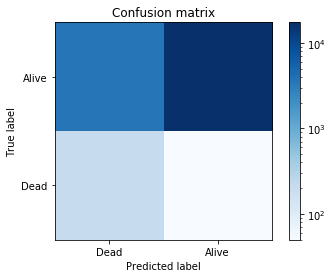

In [188]:
_ = plot_confusion_matrix(logr_confusion_matrix)

In [192]:
# logr_confusion_matrix_normalized = logr_confusion_matrix / logr_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
# print(logr_confusion_matrix_normalized)

In [193]:
# true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = logr_confusion_matrix_normalized.ravel()
# print('True positives rate: %.2f' % (true_positives_rate * 100))
# print('True negatives rate: %.2f' % (true_negatives_rate * 100))
# print('False positives rate: %.2f' % (false_positives_rate * 100))
# print('False negatives rate: %.2f' % (false_negatives_rate * 100))

In [194]:
# _ = plot_confusion_matrix(logr_confusion_matrix_normalized, title="Normalized confusion matrix")

In [195]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       1.00      0.83      0.91     20879
        Dead       0.06      0.81      0.10       259

    accuracy                           0.83     21138
   macro avg       0.53      0.82      0.50     21138
weighted avg       0.99      0.83      0.90     21138



In [225]:
y_predicted_proba_logr = logr.predict_proba(X_test)

In [233]:
y_predicted_proba_logr.shape

(21138, 2)

In [235]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('ROC Curve Logistic Regression')    
    ax.legend(loc="lower right")    
    return fig, ax

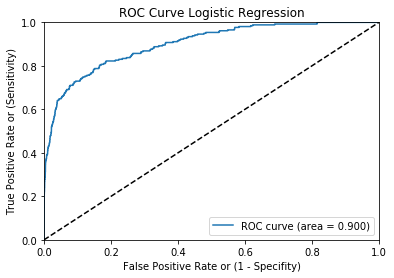

In [227]:
_ = plot_roc_curve(y_test, y_predicted_proba_logr)

In [228]:
clfTree = DecisionTreeClassifier(class_weight = 'balanced')

In [111]:
# clfTree = GridSearchCV(DecisionTreeClassifier(),
#                       param_grid = {"max_depth":np.arange(2,10),
#                                    "min_samples_leaf": np.arange(10,30)},
#                       cv=5,
#                        scoring="accuracy"
#                       )

In [229]:
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [201]:
recall_clfTree = cross_val_score(clfTree, X_train, y_train, cv = 10, scoring = "recall").mean()
precision_clfTree = cross_val_score(clfTree, X_train, y_train, cv = 10, scoring = "precision").mean()
f1_clfTree = cross_val_score(clfTree, X_train, y_train, cv = 10, scoring = "f1").mean()
print('Recall: %.3f' % recall_clfTree)
print('Precision: %.3f' % precision_clfTree)
print('F1-score: %.3f' % f1_clfTree)

Recall: 0.534
Precision: 0.540
F1-score: 0.533


In [114]:
# clfTree_grid = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced'),
#                        param_grid = {'max_depth': np.arange(2,10),
#                                     'min_samples_leaf': np.arange(2,30)},
#                        cv = 5,
#                         scoring = 'recall'
#                        )

In [115]:
# clfTree_grid.fit(X_train, y_train)

In [116]:
# print('Best recall score: %.3f' % clfTree_grid.best_score_) 
# print('Best parameters: %s' % clfTree_grid.best_params_)

In [117]:
# clfTree_grid = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced'),
#                        param_grid = {'max_depth':np.arange(2,10),
#                                     'min_samples_leaf': np.arange(2,30)},
#                        cv = 5,
#                         scoring = 'precision'
#                        )

In [118]:
# clfTree_grid.fit(X_train, y_train)

In [119]:
# print('Best precision score: %.3f' % clfTree_grid.best_score_) 
# print('Best parameters: %s' % clfTree_grid.best_params_)

In [120]:
# clfTree_grid = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced'),
#                        param_grid = {'max_depth':np.arange(2,15),
#                                     'min_samples_leaf': np.arange(3,30)},
#                        cv = 5,
#                         scoring = 'f1'
#                        )

In [121]:
# clfTree_grid.fit(X_train, y_train)

In [122]:
# print('Best F1-score: %.3f' % clfTree_grid.best_score_) 
# print('Best parameters: %s' % clfTree_grid.best_params_)

In [202]:
y_predicted = clfTree.predict(X_test)

In [203]:
clfTree_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfTree_confusion_matrix)

[[  137   122]
 [  125 20754]]


In [204]:
true_positives, false_negatives, false_positives, true_negatives = clfTree_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 137
True negatives: 20754
False positives: 125
False negatives: 122


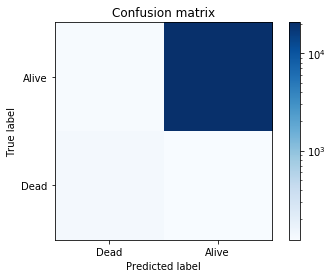

In [205]:
_ = plot_confusion_matrix(clfTree_confusion_matrix)

In [216]:
# clfTree_confusion_matrix_normalized = clfTree_confusion_matrix / clfTree_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
# print(clfTree_confusion_matrix_normalized)

In [217]:
# true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = clfTree_confusion_matrix_normalized.ravel()
# print('True positives: %.2f' % (true_positives_rate * 100))
# print('True negatives: %.2f' % (true_negatives_rate * 100))
# print('False positives: %.2f' % (false_positives_rate * 100))
# print('False negatives: %.2f' % (false_negatives_rate * 100))

In [218]:
# _ = plot_confusion_matrix(clfTree_confusion_matrix_normalized, title="Normalized confusion matrix")

In [230]:
y_predicted_proba_clfTree = clfTree.predict_proba(X_test)

In [234]:
y_predicted_proba_clfTree.shape

(21138, 2)

In [231]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('ROC Curve Classification Tree')    
    ax.legend(loc="lower right")    
    return fig, ax

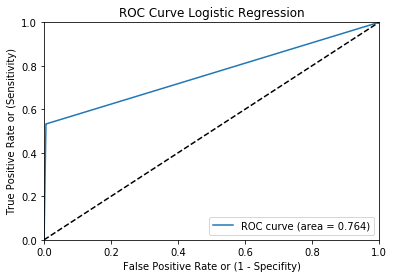

In [236]:
_ = plot_roc_curve(y_test, y_predicted_proba_clfTree)

In [237]:
clfRF = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced')

In [238]:
clfRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [240]:
cv = 3
recall_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring = "recall").mean()
precision_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring = "precision").mean()
f1_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring = "f1").mean()
print('Recall: %.3f' % recall_RF)
print('Precision: %.3f' % precision_RF)
print('F1-score: %.3f' % f1_RF)

Recall: 0.527
Precision: 0.907
F1-score: 0.666


In [136]:
# RF_grid = GridSearchCV(RandomForestClassifier(n_estimators = 50, class_weight = 'balanced'),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'recall')

In [137]:
# RF_grid.fit(X_train, y_train)

In [138]:
# print('Best recall score: %.3f' % RF_grid.best_score_) 
# print('Best parameters: %s' % RF_grid.best_params_)

In [139]:
# RF_grid = GridSearchCV(RandomForestClassifier(n_estimators = 50, class_weight = 'balanced'),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'precision')

In [140]:
# RF_grid.fit(X_train, y_train)

In [141]:
# print('Best precision score: %.3f' % RF_grid.best_score_) 
# print('Best parameters: %s' % RF_grid.best_params_)

In [142]:
# RF_grid = GridSearchCV(RandomForestClassifier(n_estimators = 50, class_weight = 'balanced'),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'f1')

In [143]:
# RF_grid.fit(X_train, y_train)

In [144]:
# print('Best F1-score: %.3f' % RF_grid.best_score_) 
# print('Best parameters: %s' % RF_grid.best_params_)

In [241]:
y_predicted = clfRF.predict(X_test)

In [242]:
RF_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(RF_confusion_matrix)

[[  138   121]
 [   20 20859]]


In [243]:
true_positives, false_negatives, false_positives, true_negatives = RF_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 138
True negatives: 20859
False positives: 20
False negatives: 121


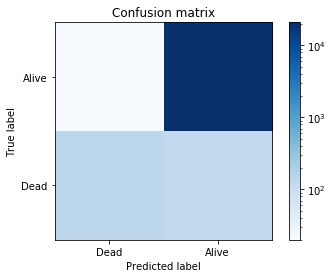

In [244]:
_ = plot_confusion_matrix(RF_confusion_matrix)

In [245]:
# RF_confusion_matrix_normalized = RF_confusion_matrix / RF_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
# print(RF_confusion_matrix_normalized)

In [246]:
# true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = RF_confusion_matrix_normalized.ravel()
# print('True positives: %.2f' % (true_positives_rate * 100))
# print('True negatives: %.2f' % (true_negatives_rate * 100))
# print('False positives: %.2f' % (false_positives_rate * 100))
# print('False negatives: %.2f' % (false_negatives_rate * 100))

In [247]:
# _ = plot_confusion_matrix(RF_confusion_matrix_normalized, title="Normalized confusion matrix")

In [248]:
y_predicted_proba_RF = clfRF.predict_proba(X_test)

In [251]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('ROC Curve Random Forest')    
    ax.legend(loc="lower right")    
    return fig, ax

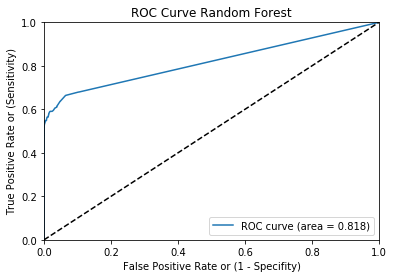

In [252]:
_ = plot_roc_curve(y_test, y_predicted_proba_RF)

In [253]:
clfGB = GradientBoostingClassifier(n_estimators = 100)

In [254]:
clfGB.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [255]:
cv = 3
recall_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring="recall").mean()
precision_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring="precision").mean()
f1_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring="f1").mean()
print('Recall: %.3f' % recall_GB)
print('Precision: %.3f' % precision_GB)
print('F1-score: %.3f' % f1_GB)

Recall: 0.524
Precision: 0.918
F1-score: 0.667


In [158]:
# GB_grid = GridSearchCV(GradientBoostingClassifier(n_estimators = 50),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'recall')

In [159]:
# GB_grid.fit(X_train, y_train)

In [160]:
# print('Best recall score: %.3f' % GB_grid.best_score_) 
# print('Best parameters: %s' % GB_grid.best_params_)

In [161]:
# GB_grid = GridSearchCV(GradientBoostingClassifier(n_estimators = 50),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'precision')

In [162]:
# GB_grid.fit(X_train, y_train)

In [163]:
# print('Best precision score: %.3f' % GB_grid.best_score_) 
# print('Best parameters: %s' % GB_grid.best_params_)

In [164]:
# GB_grid = GridSearchCV(GradientBoostingClassifier(n_estimators = 50),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'f1')

In [165]:
# GB_grid.fit(X_train, y_train)

In [166]:
# print('Best F1-score: %.3f' % GB_grid.best_score_) 
# print('Best parameters: %s' % GB_grid.best_params_)

In [256]:
y_predicted = clfGB.predict(X_test)

In [257]:
GB_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(GB_confusion_matrix)

[[  137   122]
 [    4 20875]]


In [258]:
true_positives, false_negatives, false_positives, true_negatives = GB_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 137
True negatives: 20875
False positives: 4
False negatives: 122


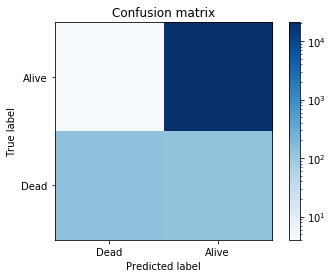

In [259]:
_ = plot_confusion_matrix(GB_confusion_matrix)

In [260]:
# clfGB_confusion_matrix_normalized = GB_confusion_matrix / GB_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
# print(clfGB_confusion_matrix_normalized)

In [261]:
# true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = clfGB_confusion_matrix_normalized.ravel()
# print('True positives: %.2f' % (true_positives_rate * 100))
# print('True negatives: %.2f' % (true_negatives_rate * 100))
# print('False positives: %.2f' % (false_positives_rate * 100))
# print('False negatives: %.2f' % (false_negatives_rate * 100))

In [262]:
# _ = plot_confusion_matrix(clfGB_confusion_matrix_normalized, title="Normalized confusion matrix")

In [263]:
y_predicted_proba_GB = clfGB.predict_proba(X_test)

In [264]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('ROC Curve Gradient Boost')    
    ax.legend(loc="lower right")    
    return fig, ax

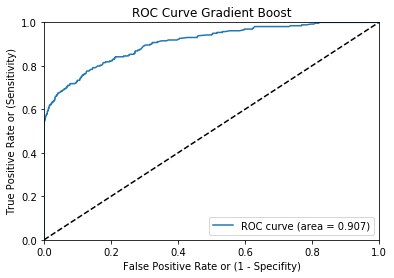

In [265]:
_ = plot_roc_curve(y_test, y_predicted_proba_GB)

In [266]:
print('Recall: %.3f' % recall_GB)

Recall: 0.524


In [274]:
print(f"Recall: {recall_GB:.1%}")

Recall: 52.4%


In [268]:
import sys
sys.version

'3.7.4 (default, Aug 13 2019, 20:35:49) \n[GCC 7.3.0]'